In [1]:
#unzip
import zipfile
import os
zip = 'preprocessed .zip'
ext_path = 'preprocessed_data'
with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(ext_path)

#list all extracted files
extracted_files = os.listdir(ext_path)
extracted_files

['T20I(BABAR AZAM).csv',
 'T20i(SHAHEEN SHAH AFRIDI).csv',
 'ODI(SHAHEEN SHAH AFRIDI).csv',
 'bowling.csv',
 'TEST(SHAHEEN SHAH AFRIDI).csv',
 'ODI(BABAR AZAM).csv',
 'allrounder.csv',
 'batting.csv',
 'TEST(BABAR AZAM).csv']

## Dataset Preprocessing
- Combine relevant player data
- Clean and preprocess
- Label Creation (already done)

In [ ]:
import pandas as pd

bat_path = os.path.join(ext_path, 'batting.csv')
bowl_path = os.path.join(ext_path, 'bowling.csv')
allround_path = os.path.join(ext_path, 'allrounder.csv')


bat_df = pd.read_csv(bat_path)
bowl_df = pd.read_csv(bowl_path)
allround_df = pd.read_csv(allround_path)


batting_info = bat_df.head(), bat_df.info()
bowling_info = bowl_df.head(), bowl_df.info()
allrounder_info = allround_df.head(), allround_df.info()

batting_info, bowling_info, allrounder_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   210 non-null    object 
 1   Span     210 non-null    object 
 2   Matches  210 non-null    int64  
 3   Inns     210 non-null    int64  
 4   NO       210 non-null    int64  
 5   Runs     210 non-null    int64  
 6   HS       210 non-null    object 
 7   AVG      210 non-null    float64
 8   BF       210 non-null    int64  
 9   SR       210 non-null    float64
 10  100      210 non-null    int64  
 11  50       210 non-null    int64  
 12  0        210 non-null    int64  
 13  4s       210 non-null    int64  
 14  6s       210 non-null    int64  
 15  format   210 non-null    object 
 16  Label    210 non-null    int64  
dtypes: float64(2), int64(11), object(4)
memory usage: 28.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 18 columns):
 #  

((           Player       Span  Matches  Inns  NO  Runs    HS    AVG     BF  \
  0       Azhar Ali  2013-2022       73   136   7  5331  302*  41.32  12499   
  1      Babar Azam  2016-2024       54    98   9  3962   196  44.51   7252   
  2     Asad Shafiq  2013-2020       61   104   3  3766   137  37.28   7479   
  3     Younis Khan  2013-2017       39    75   8  3534   218  52.74   6930   
  4  Sarfaraz Ahmed  2013-2023       53    93  14  3025   118  38.29   4287   
  
        SR  100  50   0   4s  6s format  Label  
  0  42.65   15  22  14  510  19   Test      1  
  1  54.63    9  26   8  459  23   Test      1  
  2  50.35   10  21  10  408  24   Test      1  
  3  50.99   14   7   5  328  33   Test      1  
  4  70.56    4  21   4  309   9   Test      1  ,
  None),
 (                Player       Span  Matches  Inns   Overs  Mdns  Runs  Wkts  \
  0           Yasir Shah  2014-2022       48    89  2375.5   359  7657   244   
  1  Shaheen Shah Afridi  2018-2024       30    52  1001.0 

In [3]:
# missing values
missing_values_batting = bat_df.isnull().sum()
missing_values_bowling = bowl_df.isnull().sum()
missing_values_allrounder = allround_df.isnull().sum()

missing_values_batting, missing_values_bowling, missing_values_allrounder


(Player     0
 Span       0
 Matches    0
 Inns       0
 NO         0
 Runs       0
 HS         0
 AVG        0
 BF         0
 SR         0
 100        0
 50         0
 0          0
 4s         0
 6s         0
 format     0
 Label      0
 dtype: int64,
 Player       0
 Span         0
 Matches      0
 Inns         0
 Overs        0
 Mdns         0
 Runs         0
 Wkts         0
 BBI          0
 BBM        100
 AVG          0
 Eco          0
 sr           0
 5            0
 10           0
 4            0
 format       0
 Label        0
 dtype: int64,
 Player      0
 Span        0
 Matches     0
 Runs        0
 HS          0
 Bat AVG     0
 100         0
 wcts        0
 BBI         0
 Bowl AVG    0
 5           0
 Ct          0
 St          0
 Ave Diff    0
 format      0
 Label       0
 dtype: int64)

In [ ]:
#drop BBM col
bowling_df = bowl_df.drop(columns=['BBM'])

#renaming cols
batting_df = bat_df.rename(columns={'AVG': 'Bat AVG', '4s': 'Fours', '6s': 'Sixes'})
bowling_df = bowling_df.rename(columns={'AVG': 'Bowl AVG', 'sr': 'SR'})
allrounder_df = allround_df.rename(columns={'wcts': 'Wkts', 'Bowl AVG': 'Bowl AVG', 'Bat AVG': 'Bat AVG'})

# display cols
batting_df.columns, bowling_df.columns, allrounder_df.columns


(Index(['Player', 'Span', 'Matches', 'Inns', 'NO', 'Runs', 'HS', 'Bat AVG',
        'BF', 'SR', '100', '50', '0', 'Fours', 'Sixes', 'format', 'Label'],
       dtype='object'),
 Index(['Player', 'Span', 'Matches', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts',
        'BBI', 'Bowl AVG', 'Eco', 'SR', '5', '10', '4', 'format', 'Label'],
       dtype='object'),
 Index(['Player', 'Span', 'Matches', 'Runs', 'HS', 'Bat AVG', '100', 'Wkts',
        'BBI', 'Bowl AVG', '5', 'Ct', 'St', 'Ave Diff', 'format', 'Label'],
       dtype='object'))

In [5]:
# Merge 3 dfs on 'Player' and 'Span'
main_df = pd.merge(batting_df, bowling_df, on=['Player', 'Span', 'format', 'Label'], how='outer', suffixes=('_bat', '_bowl'))
main_df = pd.merge(main_df, allrounder_df, on=['Player', 'Span', 'format', 'Label'], how='outer', suffixes=('', '_all'))

# head of resultant df
main_df.head()


,Player,Span,Matches_bat,Inns_bat,NO,Runs_bat,HS,Bat AVG,BF,SR_bat,...,HS_all,Bat AVG_all,100_all,Wkts_all,BBI_all,Bowl AVG_all,5_all,Ct,St,Ave Diff
0,Aamer Jamal,2022-2024,6.0,5.0,1.0,88.0,41,22.00,49.0,179.59,...,41,22.00,0.0,2.0,1/13,93.50,0.0,1.0,0.0,-71.49
1,Aamer Jamal,2023-2024,3.0,6.0,1.0,143.0,82,28.60,254.0,56.29,...,82,28.60,0.0,18.0,6/69,20.44,2.0,1.0,0.0,8.15
2,Aamer Yamin,2015-2018,4.0,3.0,2.0,95.0,62,95.00,96.0,98.95,...,62,95.00,0.0,2.0,1/38,77.00,0.0,0.0,0.0,18.00
3,Aamer Yamin,2015-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbas Afridi,2024-2024,10.0,5.0,1.0,41.0,17,10.25,36.0,113.88,...,17,10.25,0.0,16.0,3/20,18.43,0.0,2.0,0.0,-8.18


In [6]:
main_df.columns

Index(['Player', 'Span', 'Matches_bat', 'Inns_bat', 'NO', 'Runs_bat', 'HS',
       'Bat AVG', 'BF', 'SR_bat', '100', '50', '0', 'Fours', 'Sixes', 'format',
       'Label', 'Matches_bowl', 'Inns_bowl', 'Overs', 'Mdns', 'Runs_bowl',
       'Wkts', 'BBI', 'Bowl AVG', 'Eco', 'SR_bowl', '5', '10', '4', 'Matches',
       'Runs', 'HS_all', 'Bat AVG_all', '100_all', 'Wkts_all', 'BBI_all',
       'Bowl AVG_all', '5_all', 'Ct', 'St', 'Ave Diff'],
      dtype='object')

In [7]:
# COLS WITH HIGH % OF MISSING VALUES
missing_percentage = main_df.isnull().mean() * 100

#put median inplace of missing values to preserve distribution
main_df = main_df.fillna(main_df.median(numeric_only=True).astype(int))

missing_values_after = main_df.isnull().sum().sum()  # count of remaining missing values
missing_values_after


534

In [8]:
main_df.head()

,Player,Span,Matches_bat,Inns_bat,NO,Runs_bat,HS,Bat AVG,BF,SR_bat,...,HS_all,Bat AVG_all,100_all,Wkts_all,BBI_all,Bowl AVG_all,5_all,Ct,St,Ave Diff
0,Aamer Jamal,2022-2024,6.0,5.0,1.0,88.0,41,22.00,49.0,179.59,...,41,22.00,0.0,2.0,1/13,93.50,0.0,1.0,0.0,-71.49
1,Aamer Jamal,2023-2024,3.0,6.0,1.0,143.0,82,28.60,254.0,56.29,...,82,28.60,0.0,18.0,6/69,20.44,2.0,1.0,0.0,8.15
2,Aamer Yamin,2015-2018,4.0,3.0,2.0,95.0,62,95.00,96.0,98.95,...,62,95.00,0.0,2.0,1/38,77.00,0.0,0.0,0.0,18.00
3,Aamer Yamin,2015-2018,13.0,11.0,2.0,139.0,NaN,17.00,185.0,81.00,...,NaN,12.00,0.0,16.0,NaN,33.00,0.0,3.0,0.0,-17.00
4,Abbas Afridi,2024-2024,10.0,5.0,1.0,41.0,17,10.25,36.0,113.88,...,17,10.25,0.0,16.0,3/20,18.43,0.0,2.0,0.0,-8.18


Load optimal profiles

In [9]:
optimal_batter_df = pd.read_csv('/content/preprocessed_data/ODI(BABAR AZAM).csv')
optimal_bowler_df = pd.read_csv('/content/preprocessed_data/ODI(SHAHEEN SHAH AFRIDI).csv')

In [10]:
#show data
optimal_batter_df.head(), optimal_bowler_df.head()

(  Bat1  Runs  BF      SR  4s  6s  Opposition     Ground   Start Date
 0   54    54  60   90.00   4   0   vZimbabwe     Lahore  31 May 2015
 1   25    25  30   83.33   3   0  vSri Lanka   Dambulla  11 Jul 2015
 2   12    12  19   63.15   1   0  vSri Lanka  Pallekele  15 Jul 2015
 3  62*    62  62  100.00   2   4    vEngland  Abu Dhabi  11 Nov 2015
 4    4     4   6   66.66   0   0    vEngland  Abu Dhabi  13 Nov 2015,
    Overs  Mdns  Runs  Wkts  Econ    Ave    SR    Opposition        Ground  \
 0   10.0     0    38     2  3.80  19.00  30.0  vAfghanistan     Abu Dhabi   
 1    6.0     0    42     0  7.00      -     -        vIndia  Dubai (DICS)   
 2   10.0     1    47     2  4.70  23.50  30.0   vBangladesh     Abu Dhabi   
 3    8.0     1    46     4  5.75  11.50  12.0  vNew Zealand     Abu Dhabi   
 4    9.0     1    38     4  4.22   9.50  13.5  vNew Zealand     Abu Dhabi   
 
     Start Date  
 0  21 Sep 2018  
 1  23 Sep 2018  
 2  26 Sep 2018  
 3   7 Nov 2018  
 4   9 Nov 2018  )

In [11]:
# required stats for batsman
optimal_batter_stats= {
    'Runs': optimal_batter_df['Runs'].mean(),
    'SR': optimal_batter_df['SR'].mean(),
    '4s': optimal_batter_df['4s'].mean(),
    '6s': optimal_batter_df['6s'].mean()
}
# required stats for bowler
optimal_bowler_stats = {
    'Wkts': optimal_bowler_df['Wkts'].mean(),
    'Econ': optimal_bowler_df['Econ'].mean(),
    'Ave': pd.to_numeric(optimal_bowler_df['Ave'], errors='coerce').mean(),
    'SR': pd.to_numeric(optimal_bowler_df['SR'], errors='coerce').mean()
}
# extreacted stats
print("Optimal Batter Benchmarks:", optimal_batter_stats)
print("Optimal Bowler Benchmarks:", optimal_bowler_stats)

Optimal Batter Benchmarks: {'Runs': 50.25438596491228, 'SR': 80.03447368421052, '4s': 4.56140350877193, '6s': 0.5263157894736842}
Optimal Bowler Benchmarks: {'Wkts': 2.0, 'Econ': 5.4653846153846155, 'Ave': 26.81088888888889, 'SR': 28.41333333333333}


In [ ]:
batter_candidates = main_df[
    (main_df['Runs_bat'] >= optimal_batter_stats['Runs']) &
    (main_df['SR_bat'] >= optimal_batter_stats['SR']) &
    (main_df['Fours'] >= optimal_batter_stats['4s']) &
    (main_df['Sixes'] >= optimal_batter_stats['6s'])
]

#filter and extract player meeting min criteria
bowler_candidates = main_df[
    (main_df['Wkts'] >= optimal_bowler_stats['Wkts']) &
    (main_df['Eco'] <= optimal_bowler_stats['Econ']) &
    (main_df['Bowl AVG'] <= optimal_bowler_stats['Ave']) &
    (main_df['SR_bowl'] <= optimal_bowler_stats['SR'])
]

allround_candidates = main_df[
    (main_df['Runs_bat'] >= optimal_batter_stats['Runs']) &
    (main_df['SR_bat'] >= optimal_batter_stats['SR']) &
    (main_df['Wkts_all'] >= optimal_bowler_stats['Wkts']) &
    (main_df['Bowl AVG_all'] <= optimal_bowler_stats['Ave']) &
    (main_df['Bat AVG_all'] <= optimal_bowler_stats['Ave'])
]

# filtered squads
print("Batter Candidates:\n", batter_candidates)
print("Bowler Candidates:\n", bowler_candidates)
print("All Rounder Candidates:\n", allround_candidates)

Batter Candidates:
                 Player       Span  Matches_bat  Inns_bat   NO  Runs_bat   HS  \
0          Aamer Jamal  2022-2024          6.0       5.0  1.0      88.0   41   
2          Aamer Yamin  2015-2018          4.0       3.0  2.0      95.0   62   
3          Aamer Yamin  2015-2018         13.0      11.0  2.0     139.0  NaN   
6    Abdullah Shafique  2020-2023          6.0       6.0  1.0      64.0  41*   
8    Abdullah Shafique  2022-2023         12.0      12.0  0.0     416.0  113   
..                 ...        ...          ...       ...  ...       ...  ...   
267        Younis Khan  2013-2017         13.0      11.0  2.0     139.0  NaN   
271      Zahid Mahmood  2021-2021         13.0      11.0  2.0     139.0  NaN   
274         Zaman Khan  2023-2024         13.0      11.0  2.0     139.0  NaN   
275     Zulfiqar Babar  2013-2014         13.0      11.0  2.0     139.0  NaN   
277     Zulfiqar Babar  2013-2016         13.0      11.0  2.0     139.0  NaN   

     Bat AVG     BF

In [13]:
# missing values
missing_values_bat = batter_candidates.isnull().sum()
missing_values_bowl = bowler_candidates.isnull().sum()
missing_values_all = allround_candidates.isnull().sum()

print("Missing values in batter candidates:\n", missing_values_bat)
print("Missing values in bowler candidates:\n", missing_values_bowl)
print("Missing values in allrounder candidates:\n", missing_values_all)


Missing values in batter candidates:
 Player            0
Span              0
Matches_bat       0
Inns_bat          0
NO                0
Runs_bat          0
HS               69
Bat AVG           0
BF                0
SR_bat            0
100               0
50                0
0                 0
Fours             0
Sixes             0
format            0
Label             0
Matches_bowl      0
Inns_bowl         0
Overs             0
Mdns              0
Runs_bowl         0
Wkts              0
BBI              58
Bowl AVG          0
Eco               0
SR_bowl           0
5                 0
10                0
4                 0
Matches           0
Runs              0
HS_all          101
Bat AVG_all       0
100_all           0
Wkts_all          0
BBI_all         101
Bowl AVG_all      0
5_all             0
Ct                0
St                0
Ave Diff          0
dtype: int64
Missing values in bowler candidates:
 Player          0
Span            0
Matches_bat     0
Inns_bat        0

In [14]:
#replacing missing values with median
numeric_cols_bat = batter_candidates.select_dtypes(include=['float64', 'int64']).columns
batter_candidates[numeric_cols_bat] = batter_candidates[numeric_cols_bat].fillna(
    batter_candidates[numeric_cols_bat].median().astype(int)
)

numeric_cols_bowl = bowler_candidates.select_dtypes(include=['float64', 'int64']).columns
bowler_candidates[numeric_cols_bowl] = bowler_candidates[numeric_cols_bowl].fillna(
    bowler_candidates[numeric_cols_bowl].median().astype(int)
)

numeric_cols_all = allround_candidates.select_dtypes(include=['float64', 'int64']).columns
allround_candidates[numeric_cols_all] = allround_candidates[numeric_cols_all].fillna(
    allround_candidates[numeric_cols_all].median().astype(int)
)



# Fill missing values for categorical columns with 'Unknown'
categorical_cols_bat = batter_candidates.select_dtypes(include=['object']).columns
batter_candidates[categorical_cols_bat] = batter_candidates[categorical_cols_bat].fillna('Unknown')

categorical_cols_bowl = bowler_candidates.select_dtypes(include=['object']).columns
bowler_candidates[categorical_cols_bowl] = bowler_candidates[categorical_cols_bowl].fillna('Unknown')

categorical_cols_all = allround_candidates.select_dtypes(include=['object']).columns
allround_candidates[categorical_cols_all] = allround_candidates[categorical_cols_all].fillna('Unknown')

# Remove duplicates in dataframe
batter_candidates = batter_candidates.drop_duplicates()
bowler_candidates = bowler_candidates.drop_duplicates()
allround_candidates = allround_candidates.drop_duplicates()

# SHOW DATA
print("Batter Candidates after preprocessing:\n", batter_candidates.head())
print("Bowler Candidates after preprocessing:\n", bowler_candidates.head())
print("All Rounder Candidates after preprocessing:\n", allround_candidates.head())

<ipython-input-14-4424ee67a52f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_candidates[numeric_cols_bat] = batter_candidates[numeric_cols_bat].fillna(
<ipython-input-14-4424ee67a52f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_candidates[numeric_cols_bowl] = bowler_candidates[numeric_cols_bowl].fillna(
<ipython-input-14-4424ee67a52f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Batter Candidates after preprocessing:
               Player       Span  Matches_bat  Inns_bat   NO  Runs_bat  \
0        Aamer Jamal  2022-2024          6.0       5.0  1.0      88.0   
2        Aamer Yamin  2015-2018          4.0       3.0  2.0      95.0   
3        Aamer Yamin  2015-2018         13.0      11.0  2.0     139.0   
6  Abdullah Shafique  2020-2023          6.0       6.0  1.0      64.0   
8  Abdullah Shafique  2022-2023         12.0      12.0  0.0     416.0   

        HS  Bat AVG     BF  SR_bat  ...   HS_all  Bat AVG_all  100_all  \
0       41    22.00   49.0  179.59  ...       41         22.0      0.0   
2       62    95.00   96.0   98.95  ...       62         95.0      0.0   
3  Unknown    17.00  185.0   81.00  ...  Unknown         12.0      0.0   
6      41*    12.80   53.0  120.75  ...  Unknown         12.0      0.0   
8      113    34.66  471.0   88.32  ...  Unknown         12.0      0.0   

   Wkts_all  BBI_all Bowl AVG_all  5_all   Ct   St  Ave Diff  
0       2.0  

In [ ]:
# Add labels to all dfs
for df in [batter_candidates, bowler_candidates, allround_candidates]:
    df['Label'] = 1

#label non-optimal players= 0
optimal_players = pd.concat([
    batter_candidates['Player'],
    bowler_candidates['Player'],
    allround_candidates['Player']
])

non_optimal_players = main_df[~main_df['Player'].isin(optimal_players)].copy()
non_optimal_players['Label'] = 0

#combine all training data
training_data = pd.concat(
    [batter_candidates, bowler_candidates, allround_candidates, non_optimal_players],
    ignore_index=True
)

# Show a preview of the data
training_data.head()


,Player,Span,Matches_bat,Inns_bat,NO,Runs_bat,HS,Bat AVG,BF,SR_bat,...,HS_all,Bat AVG_all,100_all,Wkts_all,BBI_all,Bowl AVG_all,5_all,Ct,St,Ave Diff
0,Aamer Jamal,2022-2024,6.0,5.0,1.0,88.0,41,22.00,49.0,179.59,...,41,22.0,0.0,2.0,1/13,93.5,0.0,1.0,0.0,-71.49
1,Aamer Yamin,2015-2018,4.0,3.0,2.0,95.0,62,95.00,96.0,98.95,...,62,95.0,0.0,2.0,1/38,77.0,0.0,0.0,0.0,18.00
2,Aamer Yamin,2015-2018,13.0,11.0,2.0,139.0,Unknown,17.00,185.0,81.00,...,Unknown,12.0,0.0,16.0,Unknown,33.0,0.0,3.0,0.0,-17.00
3,Abdullah Shafique,2020-2023,6.0,6.0,1.0,64.0,41*,12.80,53.0,120.75,...,Unknown,12.0,0.0,16.0,Unknown,33.0,0.0,3.0,0.0,-17.00
4,Abdullah Shafique,2022-2023,12.0,12.0,0.0,416.0,113,34.66,471.0,88.32,...,Unknown,12.0,0.0,16.0,Unknown,33.0,0.0,3.0,0.0,-17.00


## Feature selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split to features and target
features = training_data[['Runs_bat', 'SR_bat', 'Fours', 'Sixes', 'Wkts', 'Eco', 'Bowl AVG', 'SR_bowl']]
target = training_data['Label']

#split to tain and test (80 and 20)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# sample
X_train_scaled[:5], y_train[:5].values


(array([[-0.31653077, -0.2348591 , -0.28531369, -0.36502031,  0.80190104,
         -1.56803793, -0.12423661,  1.01681057],
        [-0.31653077, -0.2348591 , -0.28531369, -0.36502031,  2.04712643,
         -0.06504698, -0.04629444, -0.20508309],
        [ 0.08571734,  1.42388864,  0.3469981 ,  0.41190365, -0.34501708,
         -0.22188082, -0.15625936, -0.11042936],
        [-0.31201113,  0.86142323, -0.26910057, -0.30027664, -0.34501708,
         -0.22188082, -0.15625936, -0.11042936],
        [-0.31653077, -0.2348591 , -0.28531369, -0.36502031, -0.60716979,
          0.04604365, -1.16829917, -1.14301555]]),
 array([1, 1, 1, 1, 1]))

In [17]:
results={}

## Model Application

### ***DECISION TREE***

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#DECISION TREE
decision_tree = DecisionTreeClassifier(random_state=42)
#train
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate model performance

results['DT'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=1),
    'Recall': recall_score(y_test, y_pred, zero_division=1),
    'F1 Score': f1_score(y_test, y_pred, zero_division=1)
}
results['DT']

{'Accuracy': 0.9545454545454546,
 'Precision': 1.0,
 'Recall': 0.9310344827586207,
 'F1 Score': 0.9642857142857143}

### Additional ML models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### ***LOGISTICS REGRESSION***

In [ ]:

logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Predictions and evaluation of performance
y_pred_lr = logistic_regression.predict(X_test_scaled)
results['LR'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr, zero_division=1),
    'Recall': recall_score(y_test, y_pred_lr, zero_division=1),
    'F1 Score': f1_score(y_test, y_pred_lr, zero_division=1)
}
print("Logistic Regression Results:", results['LR'])


Logistic Regression Results: {'Accuracy': 0.8863636363636364, 'Precision': 0.8529411764705882, 'Recall': 1.0, 'F1 Score': 0.9206349206349206}


### ***RANDOM FOREST CLASSIFIER***

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predictions and evaluation of performance
y_pred_rf = random_forest.predict(X_test_scaled)
results['RF'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, zero_division=1),
    'Recall': recall_score(y_test, y_pred_rf, zero_division=1),
    'F1 Score': f1_score(y_test, y_pred_rf, zero_division=1)
}
print("Random Forest Results:", results['RF'])


Random Forest Results: {'Accuracy': 0.9318181818181818, 'Precision': 1.0, 'Recall': 0.896551724137931, 'F1 Score': 0.9454545454545454}


### **SVM**

In [22]:
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test_scaled)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, zero_division=1),
    'Recall': recall_score(y_test, y_pred_svm, zero_division=1),
    'F1 Score': f1_score(y_test, y_pred_svm, zero_division=1)
}
print("SVM Results:", results['SVM'])


SVM Results: {'Accuracy': 0.8181818181818182, 'Precision': 0.7837837837837838, 'Recall': 1.0, 'F1 Score': 0.8787878787878788}


## DL model ANN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [24]:
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = dl_model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6016 - loss: 0.6838 - val_accuracy: 0.6571 - val_loss: 0.6834
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7386 - loss: 0.6360 - val_accuracy: 0.6857 - val_loss: 0.6632
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7383 - loss: 0.5870 - val_accuracy: 0.6857 - val_loss: 0.6530
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6959 - loss: 0.5703 - val_accuracy: 0.6857 - val_loss: 0.6459
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7964 - loss: 0.5230 - val_accuracy: 0.6857 - val_loss: 0.6309
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7337 - loss: 0.5012 - val_accuracy: 0.6857 - val_loss: 0.6227
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7039 - loss: 0.5382 - val_accuracy: 0.6857 - val_loss: 0.6105
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7258 - loss: 0.4797 - val_accuracy: 0.6857 - v

In [26]:
dl_loss, dl_accuracy = dl_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", dl_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8778 - loss: 0.2664
Test Accuracy: 0.8636363744735718


In [27]:
# for remaining metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions (as probabilities, then convert to 0 or 1 labels with a threshold of 0.5)
y_pred_proba = dl_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)  # Reshape to 1D array


results['DL'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=1),
    'Recall': recall_score(y_test, y_pred, zero_division=1),
    'F1 Score': f1_score(y_test, y_pred, zero_division=1)
}
results['DL']

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


{'Accuracy': 0.8636363636363636,
 'Precision': 0.8285714285714286,
 'Recall': 1.0,
 'F1 Score': 0.90625}

In [28]:

print("SVM Results:")
print(results['SVM'])

print("Decision Tree Results:")
print(results['DT'])


print("Random Forest Results:")
print(results['RF'])

print("Logistic Regression Results:")
print(results['LR'])


print("DL Model Results:")
print(results['DL'])


SVM Results:
{'Accuracy': 0.8181818181818182, 'Precision': 0.7837837837837838, 'Recall': 1.0, 'F1 Score': 0.8787878787878788}
Decision Tree Results:
{'Accuracy': 0.9545454545454546, 'Precision': 1.0, 'Recall': 0.9310344827586207, 'F1 Score': 0.9642857142857143}
Random Forest Results:
{'Accuracy': 0.9318181818181818, 'Precision': 1.0, 'Recall': 0.896551724137931, 'F1 Score': 0.9454545454545454}
Logistic Regression Results:
{'Accuracy': 0.8863636363636364, 'Precision': 0.8529411764705882, 'Recall': 1.0, 'F1 Score': 0.9206349206349206}
DL Model Results:
{'Accuracy': 0.8636363636363636, 'Precision': 0.8285714285714286, 'Recall': 1.0, 'F1 Score': 0.90625}


# Visualization of results

> Bar Chart for Model Performance Metrics

---


A grouped bar chart to compare Accuracy, Precision, Recall, and F1 Score across all models.
This gives a clear side-by-side comparison of each metric for every model.

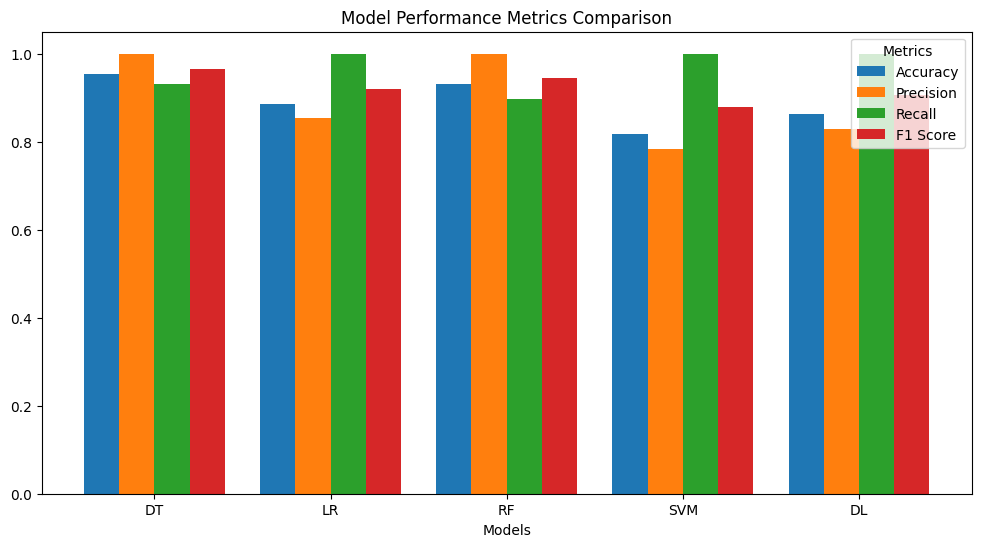

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

# Convert results dict to df for plotting
model_names = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# metric values for each model
data = {metric: [results[model][metric] for model in model_names] for metric in metrics}

# Plotting
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_title('Model Performance Metrics Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(model_names)
ax.legend(title="Metrics")

plt.show()



> Radar chart for metric profiles
---

A radar chart (spider plot) for each model to visualize how well-rounded it is across the four metrics.
This gives a holistic view of model performance in all areas.


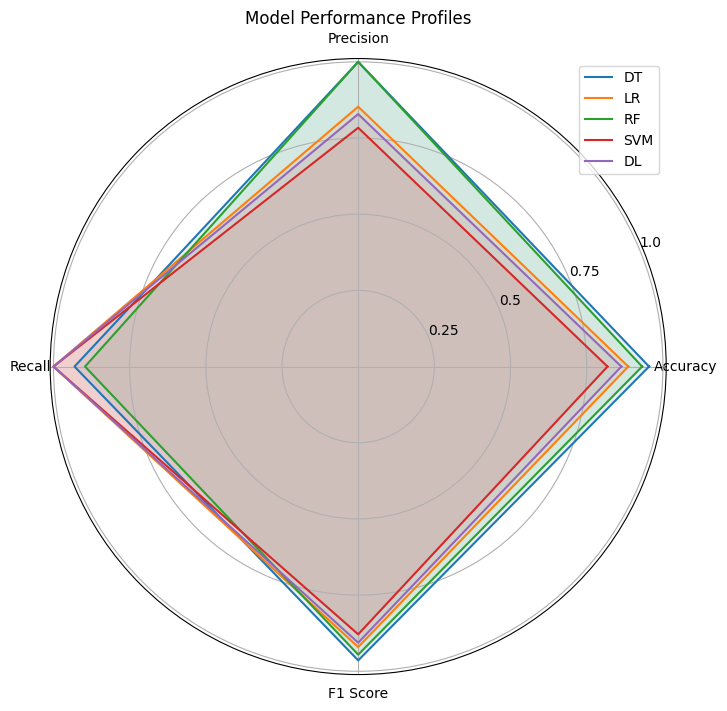

In [30]:
from math import pi
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(categories)

# values b/w 0 and 1
normalized_results = {model: [results[model][metric] for metric in categories] for model in results}

# Radar plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Close the circle

# Plotting each model
for model, values in normalized_results.items():
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0.25', '0.5', '0.75', '1.0'])
ax.set_title('Model Performance Profiles')
ax.legend(loc='upper right')

plt.show()


> Horizontal Bar Chart for Each Metric
---
Create individual horizontal bar charts for Accuracy, Precision, Recall, and F1 Score to emphasize performance differences in specific metrics.


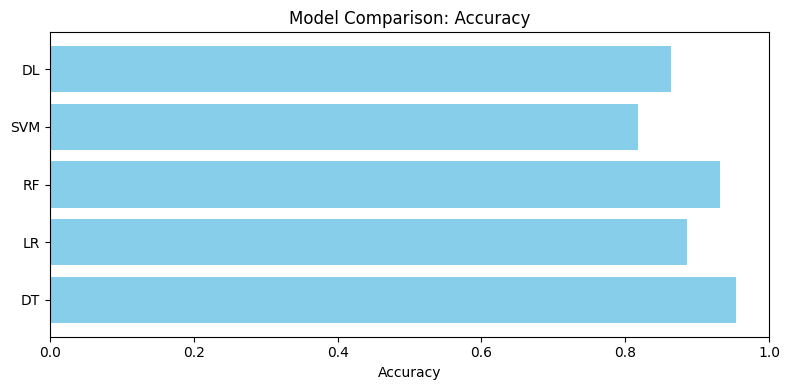

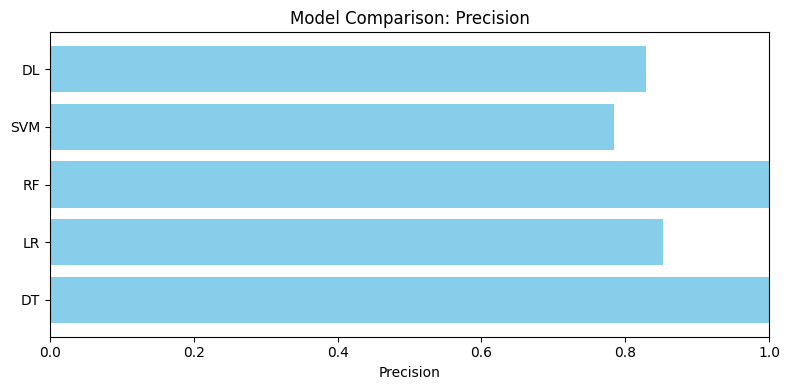

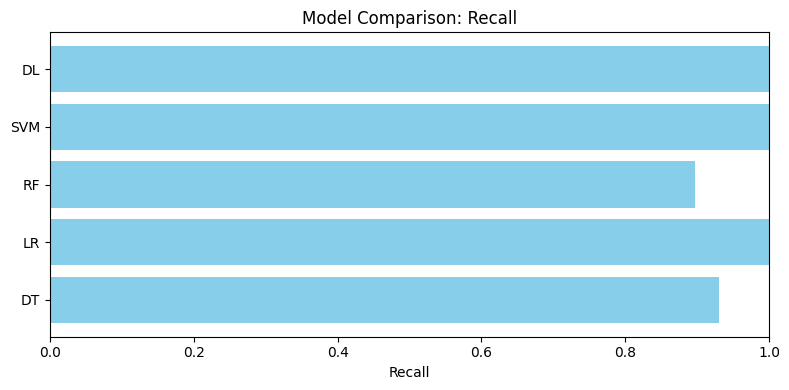

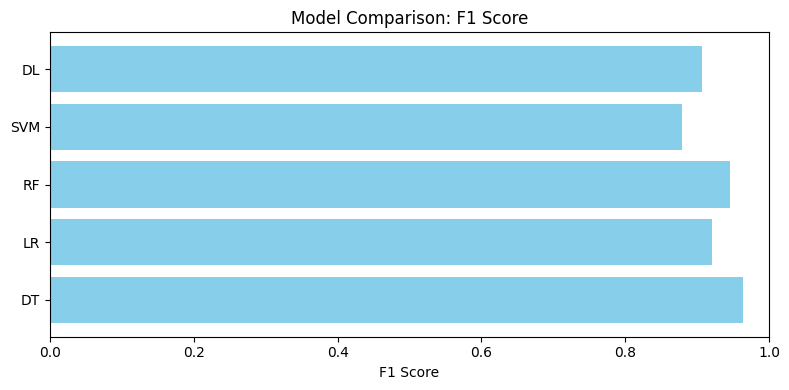

In [31]:
# Plot each metric as a separate horizontal bar chart
for metric in metrics:
    values = data[metric]
    plt.figure(figsize=(8, 4))
    plt.barh(model_names, values, color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Model Comparison: {metric}')
    plt.xlim(0, 1)

    plt.subplots_adjust(left=0.25)

    plt.tight_layout()
    plt.show()

> Heatmap for Model Metrics
---
Use a heatmap to show performance metrics as intensities for each model.


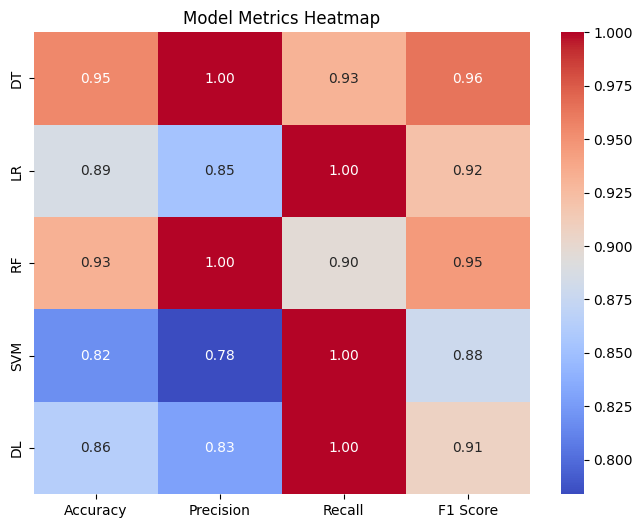

In [32]:
import seaborn as sns
import pandas as pd
# convert results to df
performance_df = pd.DataFrame(results).T

plt.figure(figsize=(8, 6))
sns.heatmap(performance_df, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Model Metrics Heatmap')
plt.show()


Get predicted optimal team from best performing model

In [33]:

best_model = performance_df['Accuracy'].idxmax()
highest_accuracy = performance_df.loc[best_model, 'Accuracy']
print(f"The model with the highest accuracy is {best_model} with an accuracy of {highest_accuracy}")

The model with the highest accuracy is DT with an accuracy of 0.9545454545454546


> Feature Importance Plot
---
feature importance is a critical output for our best model.

It shows which features contributed most to the classification of optimal players.


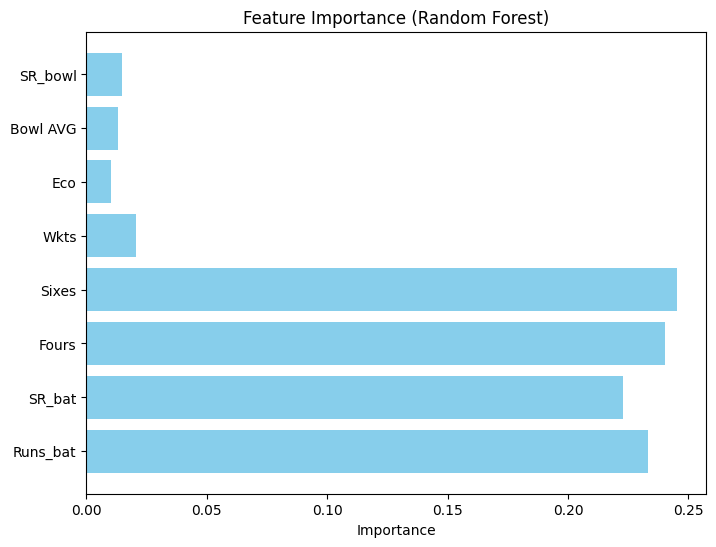

In [34]:
# Feature Importance for Random Forest
importances = random_forest.feature_importances_
feature_names = features.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


> ROC Curve (Receiver Operating Characteristic Curve)

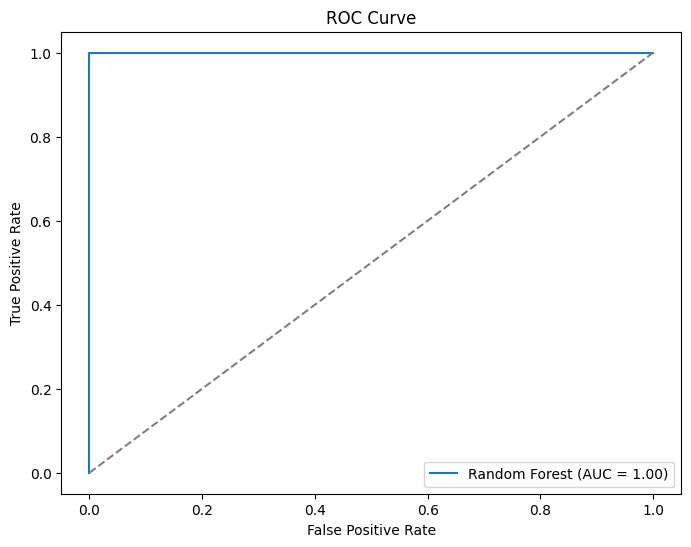

In [35]:
from sklearn.metrics import roc_curve, auc

# ROC curve for Random Forest
y_pred_prob = random_forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


and lets focus on the best classifier heatmap

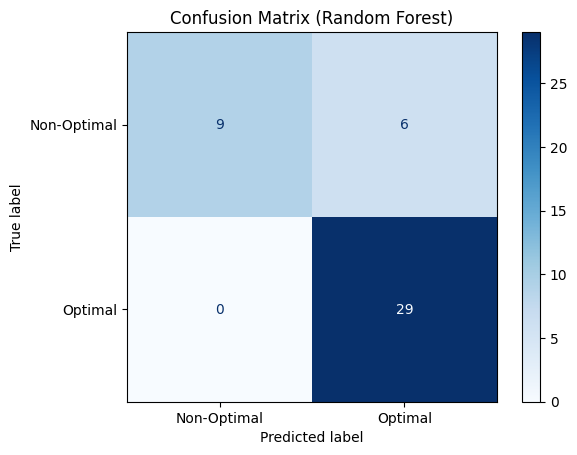

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Optimal', 'Optimal'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

> Predicted Optimal Team Composition
---
A pie chart to visualize the proportion of batters, bowlers, and all-rounders in the predicted optimal team.

In [ ]:
optimal_team_predictions = random_forest.predict(X_test_scaled)

#add predictions to test set for reference
X_test['Predicted_Label'] = optimal_team_predictions
X_test['Player'] = y_test.index  # Assuming player names are indexed in y_test

#filter the test set to show only players predicted as optimal (Label = 1)
predicted_optimal_team = X_test[X_test['Predicted_Label'] == 1]
predicted_optimal_team = predicted_optimal_team.merge(training_data[['Player']], left_index=True, right_index=True, how='left')

# Drop Player_x and rename Player_y
predicted_optimal_team = predicted_optimal_team.drop(columns=['Player_x'], errors='ignore')
predicted_optimal_team = predicted_optimal_team.rename(columns={'Player_y': 'Player'})

# predicted team
print("Predicted Optimal Team:")
predicted_optimal_team[['Player', 'Runs_bat', 'SR_bat', 'Fours', 'Sixes', 'Wkts', 'Eco', 'Bowl AVG', 'SR_bowl']]

Predicted Optimal Team:


,Player,Runs_bat,SR_bat,Fours,Sixes,Wkts,Eco,Bowl AVG,SR_bowl
100,Shaheen Shah Afridi,146.0,126.95,7.0,11.0,12.0,5.00,33.00,42.0
139,Zaman Khan,139.0,81.00,14.0,3.0,7.0,7.49,33.71,27.0
15,Asif Ali,577.0,133.87,27.0,37.0,12.0,5.00,33.00,42.0
154,Shadab Khan,139.0,81.00,14.0,3.0,107.0,7.24,23.57,19.5
73,Mohammad Nawaz (3),406.0,88.64,27.0,11.0,12.0,5.00,33.00,42.0
140,Zulfiqar Babar,139.0,81.00,14.0,3.0,12.0,7.11,15.41,13.0
30,Haider Ali,505.0,124.69,43.0,22.0,12.0,5.00,33.00,42.0
9,Ahmed Shehzad,1326.0,115.80,136.0,31.0,12.0,5.00,33.00,42.0
67,Mohammad Hafeez,139.0,81.00,14.0,3.0,29.0,6.49,22.79,21.0
18,Babar Azam,5729.0,88.75,520.0,60.0,12.0,5.00,33.00,42.0


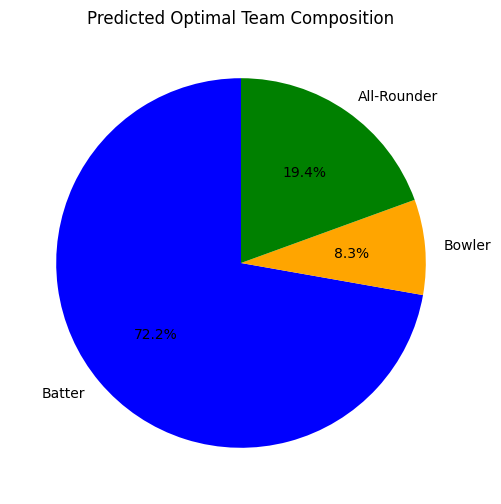

In [ ]:
# Count the number of players in each role
optimal_team = predicted_optimal_team['Player']
roles = ['Batter', 'Bowler', 'All-Rounder']
role_counts = [
    len(optimal_team[optimal_team.isin(batter_candidates['Player'])]),
    len(optimal_team[optimal_team.isin(bowler_candidates['Player'])]),
    len(optimal_team[optimal_team.isin(allround_candidates['Player'])])
]

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(role_counts, labels=roles, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
plt.title('Predicted Optimal Team Composition')
plt.show()


To visualize this in Power BI, export the predicted_optimal_team DataFrame as a CSV:

In [39]:
predicted_optimal_team.to_csv("predicted_optimal_team.csv", index=False)

We have duplicates due to matching in both formats in any context (batting, bowling or batting, allrounder)

In [ ]:

predicted_optimal_team_unique = predicted_optimal_team.drop_duplicates()

predicted_optimal_team_aggregated = predicted_optimal_team.groupby('Player', as_index=False).agg({
    'Runs_bat': 'mean',     # avg runs
    'SR_bat': 'mean',       # avg strike rate
    'Fours': 'sum',         # Total fours
    'Sixes': 'sum',         # Total sixes
    'Wkts': 'sum',          # Total wickets
    'Eco': 'mean',          # avg economy rate
    'Bowl AVG': 'mean',     # avg bowling average
    'SR_bowl': 'mean'       # avg bowling strike rate
})

predicted_optimal_team_aggregated['Runs_bat'] = predicted_optimal_team_aggregated['Runs_bat'].astype(int)
predicted_optimal_team_aggregated['Fours'] = predicted_optimal_team_aggregated['Fours'].astype(int)
predicted_optimal_team_aggregated['Sixes'] = predicted_optimal_team_aggregated['Sixes'].astype(int)
predicted_optimal_team_aggregated['Wkts'] = predicted_optimal_team_aggregated['Wkts'].astype(int)

predicted_optimal_team_aggregated.to_csv("cleaned_predicted_optimal_team.csv", index=False)
